For employee's bonus dataset, implement gradient descent in PyTorch to find optimal values of weights that decides the bonus amount.

𝑏𝑜𝑛𝑢𝑠 = 𝜔_1∗𝑝𝑒𝑟𝑓𝑜𝑟𝑚𝑎𝑛𝑐𝑒+𝜔_2∗𝑒𝑥𝑝𝑒𝑟𝑖𝑒𝑛𝑐𝑒+𝜔_3∗𝑝𝑟𝑜𝑗𝑒𝑐𝑡𝑠_𝑐𝑜𝑚𝑝𝑙𝑒𝑡𝑒𝑑+ 𝑏


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Step 1: Read the dataset from the CSV file
df = pd.read_csv('./data/bonus_dataset.csv')
df.head()

,employee_id,performance,years_of_experience,projects_completed,bonus
0,EMP_001,7,2,4,124
1,EMP_002,4,1,4,82
2,EMP_003,8,7,10,178
3,EMP_004,5,7,8,138
4,EMP_005,7,8,9,170


In [2]:
df.shape

(100, 5)

In [3]:
import torch

# Extract features and target from the DataFrame
performance = torch.tensor(df['performance'].values, dtype=torch.float32)
years_of_experience = torch.tensor(df['years_of_experience'].values, dtype=torch.float32)
projects_completed = torch.tensor(df['projects_completed'].values, dtype=torch.float32)
bonus = torch.tensor(df['bonus'].values, dtype=torch.float32)

### Batch Gradient Descent 

In [4]:
w1 = torch.rand(1, requires_grad=True)
w2 = torch.rand(1, requires_grad=True)
w3 = torch.rand(1, requires_grad=True)
bias = torch.rand(1, requires_grad=True)

# Learning rate and number of iterations
learning_rate = 0.006
epochs = 5000
# Lists to store the loss at each epoch
loss_history = []

# Step 3: Training loop for gradient descent
for epoch in range(epochs):
    # Compute the predicted bonus using the current weights and bias
    predicted_bonus = w1 * performance + w2 * years_of_experience + w3 * projects_completed + bias
    
    # Compute the Mean Squared Error (MSE) loss
    loss = ((predicted_bonus - bonus) ** 2).mean()
    loss_history.append(loss.item())
    
    # Perform backpropagation to compute gradients of the loss with respect to w1, w2, w3, and bias
    loss.backward()
    
    # Update the weights and bias using the computed gradients
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w3 -= learning_rate * w3.grad
        bias -= learning_rate * bias.grad

    # Zero the gradients after updating
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    bias.grad.zero_()

    # Print the loss at regular intervals
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [100/5000], Loss: 18.2362
Epoch [200/5000], Loss: 15.9116
Epoch [300/5000], Loss: 13.8857
Epoch [400/5000], Loss: 12.1183
Epoch [500/5000], Loss: 10.5761
Epoch [600/5000], Loss: 9.2302
Epoch [700/5000], Loss: 8.0556
Epoch [800/5000], Loss: 7.0305
Epoch [900/5000], Loss: 6.1358
Epoch [1000/5000], Loss: 5.3550
Epoch [1100/5000], Loss: 4.6735
Epoch [1200/5000], Loss: 4.0788
Epoch [1300/5000], Loss: 3.5598
Epoch [1400/5000], Loss: 3.1068
Epoch [1500/5000], Loss: 2.7114
Epoch [1600/5000], Loss: 2.3664
Epoch [1700/5000], Loss: 2.0652
Epoch [1800/5000], Loss: 1.8024
Epoch [1900/5000], Loss: 1.5730
Epoch [2000/5000], Loss: 1.3729
Epoch [2100/5000], Loss: 1.1982
Epoch [2200/5000], Loss: 1.0457
Epoch [2300/5000], Loss: 0.9126
Epoch [2400/5000], Loss: 0.7965
Epoch [2500/5000], Loss: 0.6951
Epoch [2600/5000], Loss: 0.6067
Epoch [2700/5000], Loss: 0.5295
Epoch [2800/5000], Loss: 0.4621
Epoch [2900/5000], Loss: 0.4033
Epoch [3000/5000], Loss: 0.3520
Epoch [3100/5000], Loss: 0.3072
Epoch [3200/

In [5]:
# Step 4: Print the learned weights and bias
print(f"\nLearned weights and bias:")
print(f"w1: {w1.item():.2f}, w2: {w2.item():.2f}, w3: {w3.item():.2f}, bias: {bias.item():.2f}")


Learned weights and bias:
w1: 12.03, w2: 5.91, w3: 2.13, bias: 19.38


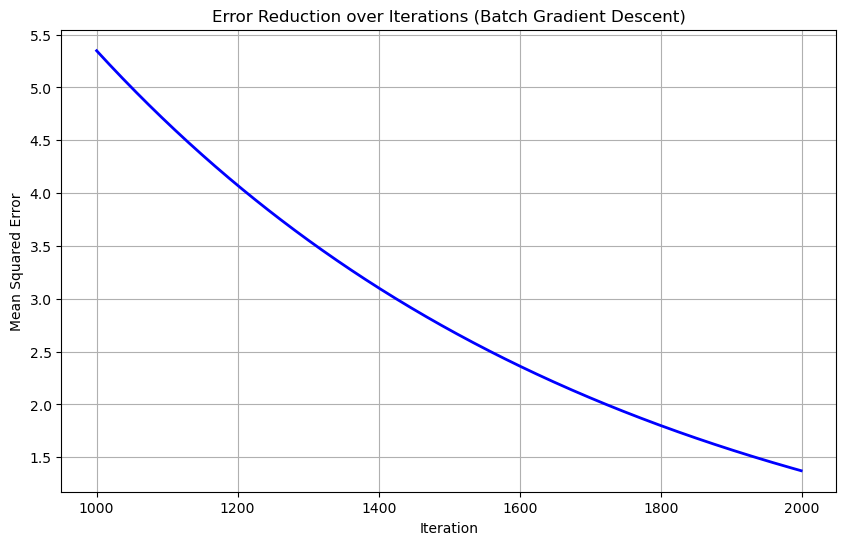

In [6]:
def plot_loss(epochs, loss_history, title):
    # Plotting the error over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss_history, color='blue', linewidth=2)
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.grid(True)
    plt.show()

plot_loss(range(1000, 2000), loss_history[1000:2000], "Error Reduction over Iterations (Batch Gradient Descent)")

### Mini Batch GD

In [7]:
# Initialize weights and bias randomly
w1 = torch.rand(1, requires_grad=True)
w2 = torch.rand(1, requires_grad=True)
w3 = torch.rand(1, requires_grad=True)
bias = torch.rand(1, requires_grad=True)

# Parameters for Mini-Batch Gradient Descent
learning_rate = 0.001
epochs = 5000
batch_size = 16  # Define the batch size

# Number of samples
n_samples = len(performance)

loss_history = []

# Training loop for mini-batch gradient descent
for epoch in range(epochs):
    for i in range(0, n_samples, batch_size):
        # Select the mini-batch
        batch_performance = performance[i:i + batch_size]
        batch_years_of_experience = years_of_experience[i:i + batch_size]
        batch_projects_completed = projects_completed[i:i + batch_size]
        batch_bonus = bonus[i:i + batch_size]
        
        # Compute the predicted bonus using the current weights and bias
        predicted_bonus = w1 * batch_performance + w2 * batch_years_of_experience + w3 * batch_projects_completed + bias
        
        # Compute the Mean Squared Error (MSE) loss
        loss = ((predicted_bonus - batch_bonus) ** 2).mean()
        loss_history.append(loss.item())
        
        # Perform backpropagation to compute gradients of the loss with respect to w1, w2, w3, and bias
        loss.backward()
        
        # Update the weights and bias using the computed gradients
        with torch.no_grad():
            w1 -= learning_rate * w1.grad
            w2 -= learning_rate * w2.grad
            w3 -= learning_rate * w3.grad
            bias -= learning_rate * bias.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        bias.grad.zero_()
        
    # Print the loss at regular intervals
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Epoch [100/5000], Loss: 13.6192
Epoch [200/5000], Loss: 10.9948
Epoch [300/5000], Loss: 9.1265
Epoch [400/5000], Loss: 7.6894
Epoch [500/5000], Loss: 6.5301
Epoch [600/5000], Loss: 5.5689
Epoch [700/5000], Loss: 4.7597
Epoch [800/5000], Loss: 4.0728
Epoch [900/5000], Loss: 3.4872
Epoch [1000/5000], Loss: 2.9868
Epoch [1100/5000], Loss: 2.5587
Epoch [1200/5000], Loss: 2.1921
Epoch [1300/5000], Loss: 1.8781
Epoch [1400/5000], Loss: 1.6091
Epoch [1500/5000], Loss: 1.3787
Epoch [1600/5000], Loss: 1.1813
Epoch [1700/5000], Loss: 1.0121
Epoch [1800/5000], Loss: 0.8672
Epoch [1900/5000], Loss: 0.7430
Epoch [2000/5000], Loss: 0.6366
Epoch [2100/5000], Loss: 0.5455
Epoch [2200/5000], Loss: 0.4674
Epoch [2300/5000], Loss: 0.4004
Epoch [2400/5000], Loss: 0.3431
Epoch [2500/5000], Loss: 0.2940
Epoch [2600/5000], Loss: 0.2519
Epoch [2700/5000], Loss: 0.2158
Epoch [2800/5000], Loss: 0.1849
Epoch [2900/5000], Loss: 0.1584
Epoch [3000/5000], Loss: 0.1358
Epoch [3100/5000], Loss: 0.1163
Epoch [3200/500

In [8]:
len(loss_history)

35000

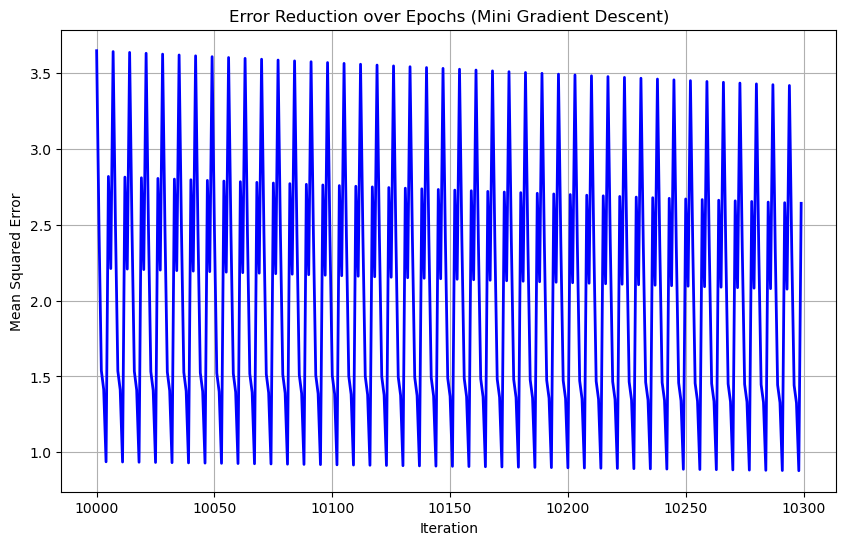

In [9]:
plot_loss(range(10000,10300), loss_history[10000:10300], "Error Reduction over Epochs (Mini Gradient Descent)")

### Stochastic Gradient Descent

In [30]:
# Initialize weights and bias randomly
w1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
w3 = torch.randn(1, requires_grad=True)
bias = torch.randn(1, requires_grad=True)

# Parameters for Stochastic Gradient Descent
learning_rate = 0.001
epochs = 500

# Number of samples
n_samples = len(performance)

loss_history = []

# Training loop for stochastic gradient descent
for epoch in range(epochs):
    for i in range(n_samples):
        # Select a single data point
        single_performance = performance[i]
        single_years_of_experience = years_of_experience[i]
        single_projects_completed = projects_completed[i]
        single_bonus = bonus[i]
        
        # Compute the predicted bonus using the current weights and bias
        predicted_bonus = w1 * single_performance + w2 * single_years_of_experience + w3 * single_projects_completed + bias
        
        # Compute the Mean Squared Error (MSE) loss for this data point
        loss = (predicted_bonus - single_bonus) ** 2
        
        if i%10==0:
            loss_history.append(loss.item())
        
        # Perform backpropagation to compute gradients of the loss with respect to w1, w2, w3, and bias
        loss.backward()
        
        # Update the weights and bias using the computed gradients
        with torch.no_grad():
            w1 -= learning_rate * w1.grad
            w2 -= learning_rate * w2.grad
            w3 -= learning_rate * w3.grad
            bias -= learning_rate * bias.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        bias.grad.zero_()
        
    # Print the loss at regular intervals
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Epoch [100/500], Loss: 0.7342
Epoch [200/500], Loss: 0.0649
Epoch [300/500], Loss: 0.0057
Epoch [400/500], Loss: 0.0005
Epoch [500/500], Loss: 0.0000
Learned weights: w1 = 12.0023, w2 = 5.9930, w3 = 2.0091
Learned bias: 19.9558


In [31]:
len(loss_history)

5000

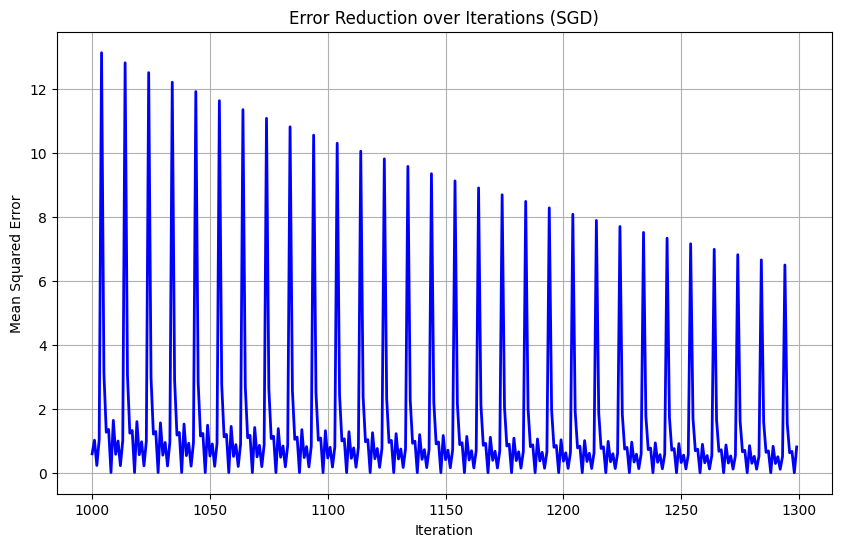

In [32]:
plot_loss(range(1000,1300), loss_history[1000:1300], "Error Reduction over Iterations (SGD)")